In [1]:
from sklearn.datasets import fetch_openml
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split

In [2]:
mnist = fetch_openml('mnist_784')
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size = 0.35, random_state = 0)
print("Number samples in training:", len(X_train))
print("Number samples in testing:", len(X_test))

Number samples in training: 45500
Number samples in testing: 24500


In [3]:
faces = fetch_lfw_people(min_faces_per_person = 60)
X_train1, X_test1, y_train1, y_test1 = train_test_split(faces.data, faces.target, test_size = 0.35, random_state = 0)
print("Number samples in training:", len(X_train1))
print("Number samples in testing:", len(X_test1))

Number samples in training: 876
Number samples in testing: 472


In [4]:
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

#Define a function that helps apply PCA on the two datasets using GaussianNB and DecisionTree models
accuracy_1, accuracy_2 = [], []
def dimensionality_reduction (model, X_training, X_testing, y_training, y_testing):
    for n in range(2, 22):
        pca = PCA(n_components = n)
        pca.fit(X_training)
        X_train_reduced = pca.transform(X_training)
        X_test_reduced = pca.transform(X_testing)
    
        model.fit(X_train_reduced, y_training)
        y_pred = model.predict(X_test_reduced)
        test_accuracy = accuracy_score(y_testing, y_pred)
        
        if model == gaussian_clf:
            accuracy_1.append(test_accuracy)
        else:
            accuracy_2.append(test_accuracy)
        print("Feature dimension size:", n)
        print("Test set accuracy: {:.4f}\n".format(test_accuracy))

In [5]:
from sklearn.naive_bayes import GaussianNB

gaussian_clf = GaussianNB()
dimensionality_reduction(gaussian_clf, X_train, X_test, y_train, y_test)

Feature dimension size: 2
Test set accuracy: 0.4386

Feature dimension size: 3
Test set accuracy: 0.4602

Feature dimension size: 4
Test set accuracy: 0.5565

Feature dimension size: 5
Test set accuracy: 0.6470

Feature dimension size: 6
Test set accuracy: 0.7029

Feature dimension size: 7
Test set accuracy: 0.7239

Feature dimension size: 8
Test set accuracy: 0.7555

Feature dimension size: 9
Test set accuracy: 0.7570

Feature dimension size: 10
Test set accuracy: 0.7691

Feature dimension size: 11
Test set accuracy: 0.7721

Feature dimension size: 12
Test set accuracy: 0.7847

Feature dimension size: 13
Test set accuracy: 0.7947

Feature dimension size: 14
Test set accuracy: 0.8026

Feature dimension size: 15
Test set accuracy: 0.8035

Feature dimension size: 16
Test set accuracy: 0.8166

Feature dimension size: 17
Test set accuracy: 0.8225

Feature dimension size: 18
Test set accuracy: 0.8267

Feature dimension size: 19
Test set accuracy: 0.8323

Feature dimension size: 20
Test set 

In [6]:
accuracy_1

[0.43865306122448977,
 0.4602040816326531,
 0.5564897959183673,
 0.6469795918367347,
 0.7029387755102041,
 0.7238775510204082,
 0.7555102040816326,
 0.7569795918367347,
 0.7691020408163265,
 0.7721632653061224,
 0.7847755102040816,
 0.7944897959183673,
 0.8023673469387755,
 0.8036734693877551,
 0.8166122448979591,
 0.8225714285714286,
 0.8266530612244898,
 0.8321224489795919,
 0.839469387755102,
 0.8415510204081633]

In [7]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier()
dimensionality_reduction(tree_clf, X_train, X_test, y_train, y_test)

Feature dimension size: 2
Test set accuracy: 0.3778

Feature dimension size: 3
Test set accuracy: 0.4298

Feature dimension size: 4
Test set accuracy: 0.5571

Feature dimension size: 5
Test set accuracy: 0.6635

Feature dimension size: 6
Test set accuracy: 0.7473

Feature dimension size: 7
Test set accuracy: 0.7797

Feature dimension size: 8
Test set accuracy: 0.8007

Feature dimension size: 9
Test set accuracy: 0.8078

Feature dimension size: 10
Test set accuracy: 0.8169

Feature dimension size: 11
Test set accuracy: 0.8205

Feature dimension size: 12
Test set accuracy: 0.8236

Feature dimension size: 13
Test set accuracy: 0.8276

Feature dimension size: 14
Test set accuracy: 0.8336

Feature dimension size: 15
Test set accuracy: 0.8335

Feature dimension size: 16
Test set accuracy: 0.8349

Feature dimension size: 17
Test set accuracy: 0.8356

Feature dimension size: 18
Test set accuracy: 0.8372

Feature dimension size: 19
Test set accuracy: 0.8352

Feature dimension size: 20
Test set 

In [8]:
accuracy_2

[0.37779591836734694,
 0.42983673469387756,
 0.5570612244897959,
 0.663469387755102,
 0.7473061224489795,
 0.7796734693877551,
 0.8006530612244898,
 0.8078367346938775,
 0.8168571428571428,
 0.820530612244898,
 0.8235918367346938,
 0.8275510204081633,
 0.8335510204081633,
 0.8335102040816327,
 0.8349387755102041,
 0.8356326530612245,
 0.8372244897959183,
 0.8351836734693877,
 0.8350612244897959,
 0.8368163265306122]

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def plotting ():
    plt.plot(accuracy_1, "r^", linewidth = 2, label = "GaussianNB")
    plt.plot(accuracy_2, "b*", linewidth = 2, label = "DecisionTree")
    plt.xlim(0, 21)
    plt.ylim(0, 1)
    my_x_ticks = np.arange(0, 21, 1)
    my_y_ticks = np.arange(0, 1, 0.1)
    plt.xticks(my_x_ticks)
    plt.yticks(my_y_ticks)
    plt.title("Predictive performance")
    plt.xlabel("Iteration of feature dimension sizes")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid()
    plt.show()

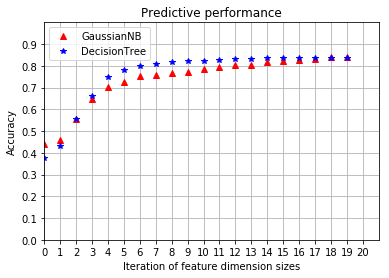

In [10]:
plotting()

In [11]:
#Clear the precious accuracies
accuracy_1, accuracy_2 = [], []

In [12]:
dimensionality_reduction(gaussian_clf, X_train1, X_test1, y_train1, y_test1)

Feature dimension size: 2
Test set accuracy: 0.4047

Feature dimension size: 3
Test set accuracy: 0.4068

Feature dimension size: 4
Test set accuracy: 0.4343

Feature dimension size: 5
Test set accuracy: 0.4386

Feature dimension size: 6
Test set accuracy: 0.4449

Feature dimension size: 7
Test set accuracy: 0.4492

Feature dimension size: 8
Test set accuracy: 0.4597

Feature dimension size: 9
Test set accuracy: 0.4640

Feature dimension size: 10
Test set accuracy: 0.4809

Feature dimension size: 11
Test set accuracy: 0.4958

Feature dimension size: 12
Test set accuracy: 0.5254

Feature dimension size: 13
Test set accuracy: 0.5360

Feature dimension size: 14
Test set accuracy: 0.5360

Feature dimension size: 15
Test set accuracy: 0.5530

Feature dimension size: 16
Test set accuracy: 0.5996

Feature dimension size: 17
Test set accuracy: 0.6229

Feature dimension size: 18
Test set accuracy: 0.6165

Feature dimension size: 19
Test set accuracy: 0.6123

Feature dimension size: 20
Test set 

In [13]:
dimensionality_reduction(tree_clf, X_train1, X_test1, y_train1, y_test1)

Feature dimension size: 2
Test set accuracy: 0.2076

Feature dimension size: 3
Test set accuracy: 0.2373

Feature dimension size: 4
Test set accuracy: 0.2691

Feature dimension size: 5
Test set accuracy: 0.2881

Feature dimension size: 6
Test set accuracy: 0.3284

Feature dimension size: 7
Test set accuracy: 0.3284

Feature dimension size: 8
Test set accuracy: 0.3114

Feature dimension size: 9
Test set accuracy: 0.3496

Feature dimension size: 10
Test set accuracy: 0.3686

Feature dimension size: 11
Test set accuracy: 0.3263

Feature dimension size: 12
Test set accuracy: 0.4068

Feature dimension size: 13
Test set accuracy: 0.3983

Feature dimension size: 14
Test set accuracy: 0.3941

Feature dimension size: 15
Test set accuracy: 0.4110

Feature dimension size: 16
Test set accuracy: 0.4470

Feature dimension size: 17
Test set accuracy: 0.4343

Feature dimension size: 18
Test set accuracy: 0.4449

Feature dimension size: 19
Test set accuracy: 0.4428

Feature dimension size: 20
Test set 

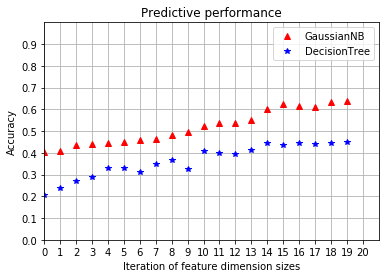

In [14]:
plotting()

In [15]:
from sklearn.datasets import load_files

reviews_train = load_files("aclImdb/train/")
text_train, y_train = reviews_train.data, reviews_train.target
print("type of text_train: {}".format(type(text_train)))
print("length of text_train: {}".format(len(text_train))) 
print("text_train[1]:\n{}".format(text_train[1]))

type of text_train: <class 'list'>
length of text_train: 75000
text_train[1]:
b"Amount of disappointment I am getting these days seeing movies like Partner, Jhoom Barabar and now, Heyy Babyy is gonna end my habit of seeing first day shows.<br /><br />The movie is an utter disappointment because it had the potential to become a laugh riot only if the d\xc3\xa9butant director, Sajid Khan hadn't tried too many things. Only saving grace in the movie were the last thirty minutes, which were seriously funny elsewhere the movie fails miserably. First half was desperately been tried to look funny but wasn't. Next 45 minutes were emotional and looked totally artificial and illogical.<br /><br />OK, when you are out for a movie like this you don't expect much logic but all the flaws tend to appear when you don't enjoy the movie and thats the case with Heyy Babyy. Acting is good but thats not enough to keep one interested.<br /><br />For the positives, you can take hot actresses, last 30 minutes,

In [16]:
text_train = [doc.replace(b"<br />", b" ") for doc in text_train]
print("Samples per class (training): {}".format(np.bincount(y_train)))

Samples per class (training): [12500 12500 50000]


In [17]:
reviews_test = load_files("aclImdb/test/")
text_test, y_test = reviews_test.data, reviews_test.target 
print("Number of documents in test data: {}".format(len(text_test))) 
print("Samples per class (test): {}".format(np.bincount(y_test))) 
text_test = [doc.replace(b"<br />", b" ") for doc in text_test]

Number of documents in test data: 25000
Samples per class (test): [12500 12500]


In [18]:
#Bag of words
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

vect = CountVectorizer(min_df=5, stop_words="english").fit(text_train) 
X_train = vect.transform(text_train) 
print("X_train:\n{}".format(repr(X_train)))

X_train:
<75000x44223 sparse matrix of type '<class 'numpy.int64'>'
	with 6577418 stored elements in Compressed Sparse Row format>


In [19]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(DecisionTreeClassifier(), X_train, y_train, cv=5) 
print("Mean cross-validation accuracy: {:.2f}".format(np.mean(scores)))

Mean cross-validation accuracy: 0.56


In [20]:
from sklearn.linear_model import LogisticRegression

scores = cross_val_score(LogisticRegression(), X_train, y_train, cv=5) 
print("Mean cross-validation accuracy: {:.2f}".format(np.mean(scores)))

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Mean cross-validation accuracy: 0.71


In [22]:
from sklearn.neighbors import KNeighborsClassifier

scores = cross_val_score(KNeighborsClassifier(), X_train, y_train, cv=5) 
print("Mean cross-validation accuracy: {:.2f}".format(np.mean(scores)))

Mean cross-validation accuracy: 0.59


In [25]:
from sklearn.ensemble import VotingClassifier

clf1 = DecisionTreeClassifier()
clf2 = LogisticRegression()
clf3 = KNeighborsClassifier()
eclf = VotingClassifier(estimators = [('dt', clf1), ('lr', clf2), ('knn', clf3)], voting = 'hard')
scores = cross_val_score(eclf, X_train, y_train, cv = 5)
scores.mean()

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the 

0.6643600000000001

In [26]:
#Bagging Ensemble
from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier(clf2)
scores = cross_val_score(bagging, X_train, y_train, cv = 5)
scores.mean()

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the 

0.7104933333333333

In [27]:
# Adaboost algorithm
from sklearn.ensemble import AdaBoostClassifier

adabooster = AdaBoostClassifier(n_estimators = 50)
scores = cross_val_score(adabooster, X_train, y_train, cv=5)
scores.mean()

0.6280933333333333